Questions.. how do I predict macro trends for Crypto currencies 

### Get the dates and amount of fear greed  

In [1]:
import pandas as pd
savedf = pd.read_csv(r"./Fear Greed Index.csv")

# Dropping rows
savedf = savedf.drop(columns='Unnamed: 1')
savedf = savedf.drop(columns='Unnamed: 2')
savedf = savedf.drop(columns='Unnamed: 3')
savedf = savedf.drop(columns='Unnamed: 4')
savedf = savedf.drop(columns='Unnamed: 5')
savedf = savedf.drop(savedf.tail(5).index)

# Renaming columns 
savedf = savedf.rename(columns={'Unnamed: 0': 'c1'})

### Split the date and the amount into two seporate columns 

In [2]:
# totally not relavent to the rest of the analysis
# df['c2'] = df.iloc[::2,0]
# df['c3'] = df.iloc[1::2,0]

# df

### Drop NaNs

In [3]:
df = savedf

df = pd.DataFrame(df.c1.values.reshape(-1,2),columns=['c2','c3'])
df = df.rename(columns={'c2': 'date'})
df = df.rename(columns={'c3': 'sentiment'})

savedf = df

### strip the words from C2

In [4]:
df = savedf

df['sentiment'] = df['sentiment'].str[0:2]
df = df.replace(',','', regex=True)
df['sentiment'] = pd.to_numeric(df['sentiment'])

savedf = df

#### Add btc price 

In [5]:
df = savedf

btcPrice = pd.read_csv(r"./btcPrice.csv")
btcPrice = btcPrice.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close'])
btcPriceSave = btcPrice

savedf = df

#### Merge BTC prices with dataframe    

In [6]:
btcPrice = btcPriceSave

df = savedf

df.date = pd.to_datetime(df.date)
btcPrice.Date = pd.to_datetime(btcPrice.Date)
btcPrice = btcPrice.rename(columns={'Date': 'date'})
btcPrice = btcPrice.rename (columns={'Close': 'price'})
df = pd.merge(btcPrice, df, how='outer', on='date')
df = df.dropna()

savedf = df
df

,date,price,sentiment
1233,2018-02-01,9170.540039,30.0
1234,2018-02-02,8830.750000,15.0
1235,2018-02-03,9174.910156,40.0
1236,2018-02-04,8277.009766,24.0
1237,2018-02-05,6955.270020,11.0
...,...,...,...
2682,2022-01-20,40680.417969,24.0
2683,2022-01-21,36457.316406,19.0
2684,2022-01-22,35030.250000,13.0
2685,2022-01-23,36276.804688,11.0


#### Intersect both graphs over each other 

,date,price,sentiment,avg
1233,2018-02-01,9170.540039,30.0,NaN
1234,2018-02-02,8830.750000,15.0,NaN
1235,2018-02-03,9174.910156,40.0,NaN
1236,2018-02-04,8277.009766,24.0,NaN
1237,2018-02-05,6955.270020,11.0,NaN
...,...,...,...,...
2682,2022-01-20,40680.417969,24.0,22.3
2683,2022-01-21,36457.316406,19.0,22.1
2684,2022-01-22,35030.250000,13.0,21.2
2685,2022-01-23,36276.804688,11.0,20.2


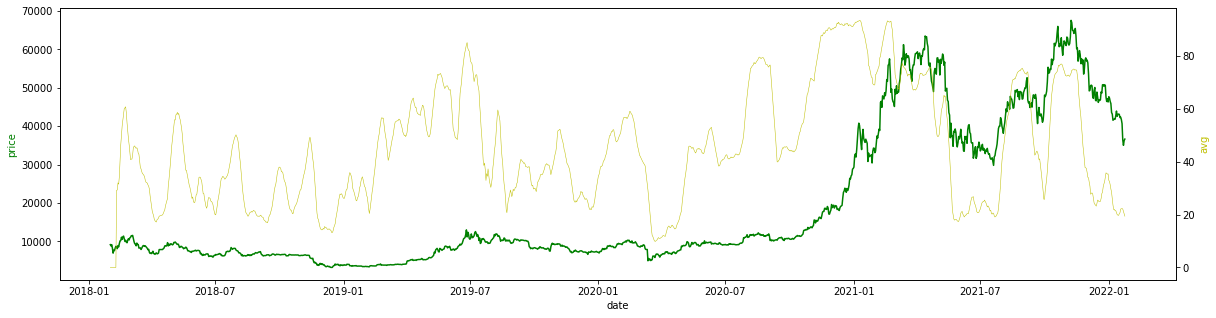

In [7]:
df = savedf

import numpy as np
import matplotlib.pyplot as plt

# slicing function
# df = df.iloc[np.r_[0:1000]]

def trailingAverage(df, n):
    df['avg'] = df['sentiment'].rolling(n).mean()
    return df

def replaceNaN(x):
    for i in range(len(x)):
        if np.isnan(x[i]):
            x[i] = 0
    return x

def turnNumbersToPerecentes(x):
    for i in range(len(x)):
        x[i] = ("{:.2%}".format( x[i]/ 100)) 

    return x

date = df['date'].tolist()
sentiment = df['sentiment'].tolist()
price = df['price'].tolist()
avg = trailingAverage(df, 10)['avg'].tolist()
avg = replaceNaN(avg)

# avg = turnNumbersToPerecentes(avg)

# correlation = df['price'].corr(df['avg'])
# correlation = ("{:.2%}".format(correlation))
# correlation

plt.rcParams["figure.figsize"] = (20,5) 

x = np.arange(0, 10, 0.1) 
y1 = 0.05 * x**2 
y2 = -1 *y1 

fig, ax1 = plt.subplots() 

ax2 = ax1.twinx() 
ax1.plot(date, price, 'g-') 
ax2.plot(date, avg, 'y-', linewidth=.5) 

ax1.set_xlabel('date') 
ax1.set_ylabel('price', color='g') 
ax2.set_ylabel('avg', color='y')

savedf = df
df

### What is the overlay of CryptoCurrency from Google trends with BTC

In [8]:
df = savedf

googleTrends = pd.read_csv(r"./googleTrendsCryptoCurrency.csv")

googleTrends = googleTrends.rename(columns={'Week': 'Date'})
googleTrends = googleTrends.rename(columns={'Cryptocurrency: (Worldwide)': 'searches'})

savedGoogleTrends = googleTrends
googleTrends

,Date,searches
0,2017-04-23,2
1,2017-04-30,2
2,2017-05-07,3
3,2017-05-14,3
4,2017-05-21,5
...,...,...
256,2022-03-20,32
257,2022-03-27,36
258,2022-04-03,32
259,2022-04-10,31


### Combine googleTrends with dataframe

In [9]:
df = savedf
googleTrends = savedGoogleTrends

df.date = pd.to_datetime(df.date)
googleTrends.Date = pd.to_datetime(googleTrends.Date)
googleTrends = googleTrends.rename(columns={'Date': 'date'})
googleTrends = googleTrends.rename (columns={'Close': 'price'})
df = pd.merge(googleTrends, df, how='outer', on='date')
df = df.dropna()

savedf = df
df

,date,searches,price,sentiment,avg
42,2018-02-11,21.0,8129.970215,31.0,29.3
43,2018-02-18,20.0,10551.799805,63.0,53.6
44,2018-02-25,16.0,9664.730469,33.0,54.6
45,2018-03-04,16.0,11512.599609,44.0,41.0
46,2018-03-11,16.0,9578.629883,40.0,45.3
...,...,...,...,...,...
244,2021-12-26,48.0,50809.515625,37.0,32.4
245,2022-01-02,54.0,47345.218750,29.0,32.5
246,2022-01-09,51.0,41911.601563,23.0,22.0
247,2022-01-16,56.0,43113.878906,21.0,20.3


### Plot the chart

In [96]:
df = savedf

def convertToPercent(x):
    for i in range(len(x)):
        x[i] = ("{:.2%}".format( x[i]/ 100)) 

    return x

savedf = df

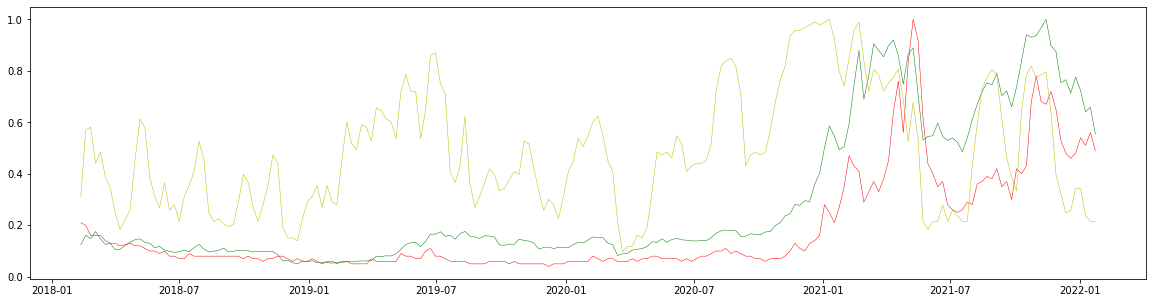

In [99]:
df = savedf

###

def turnFloatToInt(x):
    for i in range(len(x)):
        x[i] = int(x[i])
    return x

def normalizeDataToOne(x):
    max = findMax(x)
    for i in range(len(x)):
        x[i] = x[i] / max
    return x

### Helper functions
def findMax(x):
    max = 0
    for i in range(len(x)):
        if x[i] > max:
            max = x[i]
    return max

### Checks 
def isListInt(x):
    for i in range(len(x)):
        if type(x[i]) != int:
            return False
    return True

def isListFloat(x):
    for i in range(len(x)):
        if type(x[i]) != float:
            return False
    return True

###############################################################################################
date = df['date'].tolist()

price = turnFloatToInt(df['price'].tolist())
price = normalizeDataToOne(price)
avg = turnFloatToInt(df['avg'].tolist())
avg = normalizeDataToOne(avg)
searches = turnFloatToInt(df['searches'].tolist())
searches = normalizeDataToOne(searches)

###############################################################################################
plt.rcParams["figure.figsize"] = (20,5) 

def threeLinePlot(x, y1, y2, y3):
    plt.plot(x, y1, 'g-', linewidth=.5)
    plt.plot(x, y2, 'r-', linewidth=.5)
    plt.plot(x, y3, 'y-', linewidth=.5)

    plt.show()

threeLinePlot(date, price, searches, avg)